# Tests on GPy and Gaussian Process codes

Manually written algorithm to sample from a Gaussian process:

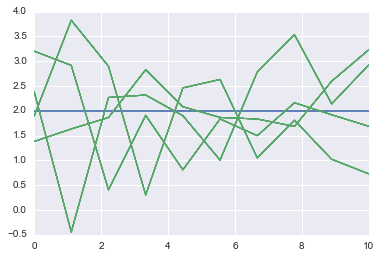

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import GPy
%matplotlib inline

n = 10  #Number of inputs
dim = 1 #dimensions

#Random set of n inputs
x = np.linspace(0, 10, n)[:,None]

#Parameters of RBF kernel
lengthscale = .1
variance= 1.

#Covariance function
k = GPy.kern.RBF(dim, lengthscale = lengthscale, variance = variance)

#Covariance matrix
K = k.K(x)

#Mean function as zero for all inputs
mean = lambda(x): np.array([2 for i in range(x.shape[0])])
m = mean(x)

#Cholesky decomposition, using some stability parameters
nugget = 1e-6
C = K + nugget*np.eye(x.shape[0])
L = np.linalg.cholesky(C)

#For 4 samples:
n_samples = 4
fig, ax = plt.subplots()
ax.plot(x,m)
for i in xrange(n_samples):
    z = np.random.randn(x.shape[0],1) #Standard normal
    f = m + np.dot(L,z)
    ax.plot(x, f, color=sns.color_palette()[1], linewidth=1)